In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load dataset
df = pd.read_csv('airline-safety.csv')

# Display first few rows
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [9]:
# Select the safety-related columns for clustering
features = df[['incidents_85_99', 'fatal_accidents_85_99', 'fatalities_85_99', 
               'incidents_00_14', 'fatal_accidents_00_14', 'fatalities_00_14']]

In [11]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

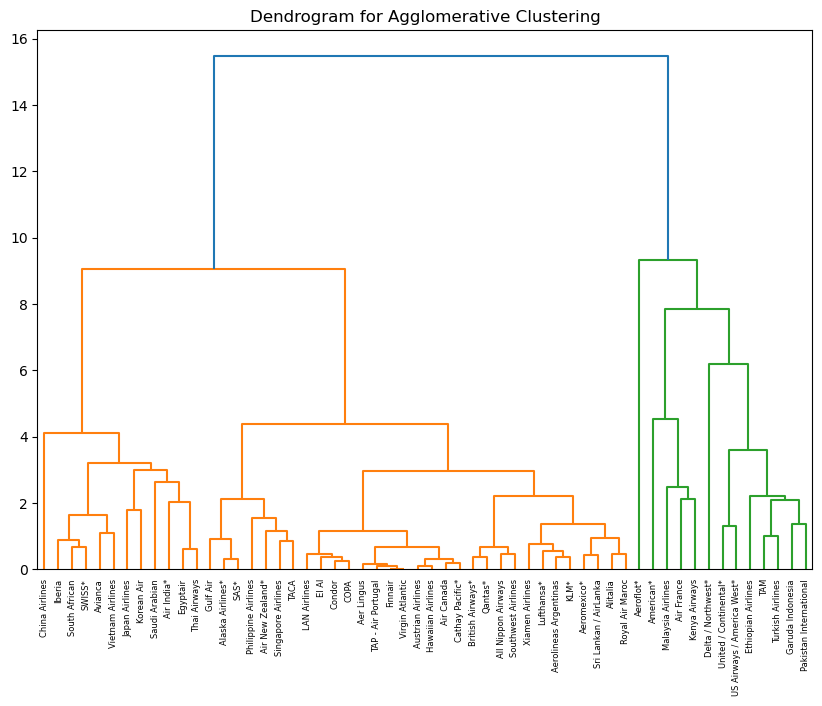

In [15]:
# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
agg_labels = agg_clustering.fit_predict(scaled_features)

# Generate the dendrogram for visualization
linked = linkage(scaled_features, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['airline'].values, leaf_rotation=90)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()

In [17]:
# Perform KMeans (Divisive) Clustering
kmeans_clustering = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_clustering.fit_predict(scaled_features)

In [19]:
# Add clustering results to the dataframe
df['Agglomerative_Cluster'] = agg_labels
df['KMeans_Cluster'] = kmeans_labels

# Display first few rows with cluster assignments
df[['airline', 'Agglomerative_Cluster', 'KMeans_Cluster']].head()

,airline,Agglomerative_Cluster,KMeans_Cluster
0,Aer Lingus,0,1
1,Aeroflot*,2,2
2,Aerolineas Argentinas,0,1
3,Aeromexico*,0,1
4,Air Canada,0,1


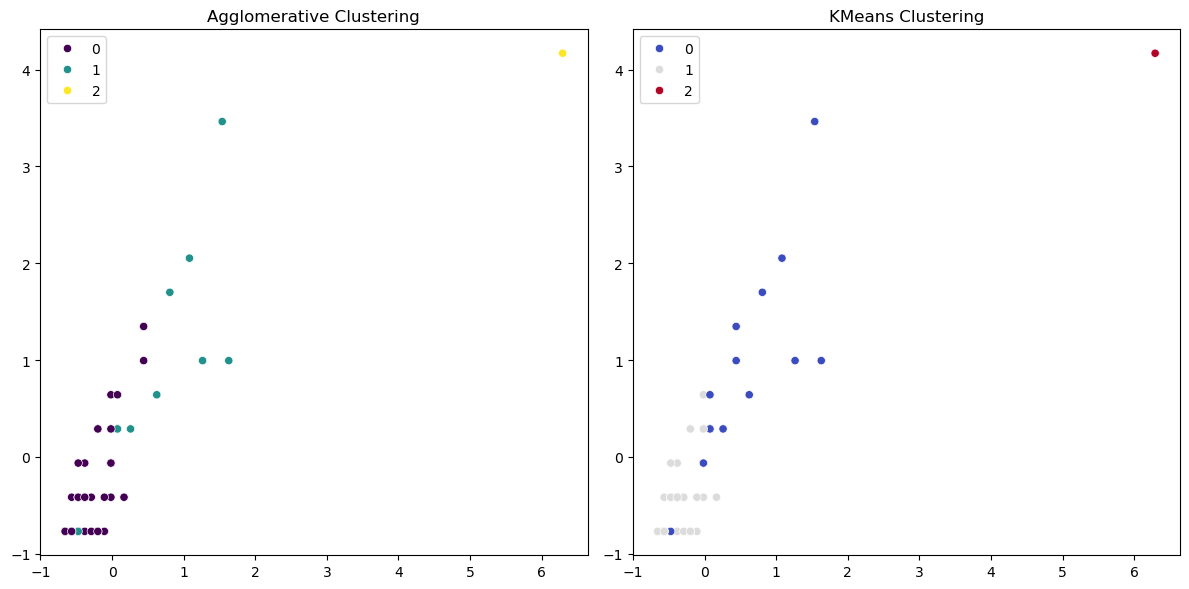

In [21]:
# Plotting scatter plots for both clustering methods

# Setting up plot grid
plt.figure(figsize=(12, 6))

# Agglomerative Clustering plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=agg_labels, palette='viridis')
plt.title('Agglomerative Clustering')

# KMeans Clustering plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels, palette='coolwarm')
plt.title('KMeans Clustering')

plt.tight_layout()
plt.show()

In [23]:
# Displaying the number of airlines in each cluster for both methods
agg_cluster_summary = df.groupby('Agglomerative_Cluster').size()
kmeans_cluster_summary = df.groupby('KMeans_Cluster').size()

print("Agglomerative Clustering Cluster Sizes:\n", agg_cluster_summary)
print("\nKMeans Clustering Cluster Sizes:\n", kmeans_cluster_summary)

Agglomerative Clustering Cluster Sizes:
 Agglomerative_Cluster
0    43
1    12
2     1
dtype: int64

KMeans Clustering Cluster Sizes:
 KMeans_Cluster
0    18
1    37
2     1
dtype: int64


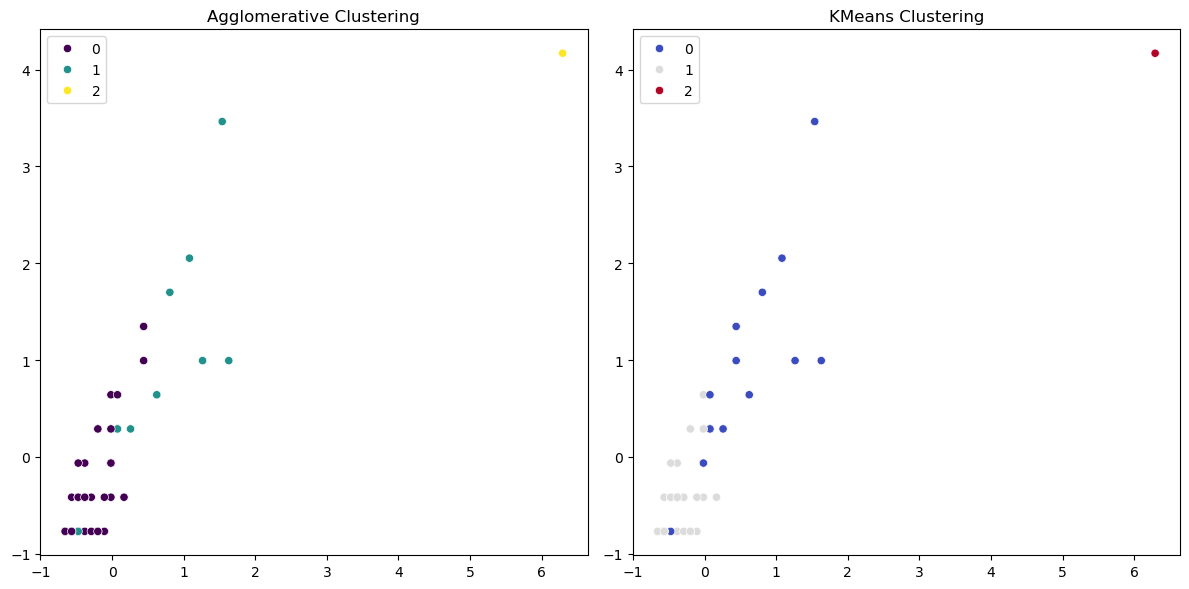

In [25]:
plt.figure(figsize=(12, 6))

# Agglomerative Clustering plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=agg_labels, palette='viridis')
plt.title('Agglomerative Clustering')

# KMeans Clustering plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels, palette='coolwarm')
plt.title('KMeans Clustering')

plt.tight_layout()
plt.show()